# Global Object
We can acces it anywhere in any files

In [ ]:
//Global Objects in Javascript
console.log(); 
setTimeout();
clearTimeout();
setInterval(); //repeatedly call a function after a given delay
clearInterval(); // stop that function to being called repeatedly

// All this objects can be accesed by window object

In browser the window object represents the global scope. With **Window** object it is possible to access all the variables and the functions that are defined as globally. 

In [ ]:
window.console.log();
console.log(); // JS engine will prefix this statement with window.

var message = ''; 
window.message // Created variable can be accesed by window object

In node does not exists **window** object, instead exists **global** object.

In [5]:
// global.setInterval()
global.console.log('x')

x


undefined

But the variables and functions defined are not added to the global object, they are only scoped to the JS file. They are not available outside the JS file because of Node Modular System.

In [7]:
//app.js
//----------------------------------
var message = ''; //the variables 
console.log(global.message)
//----------------------------------

//in console:
//------------------------------
// node app.js
//------------------------------

undefined

# Modules

**Problem with Global Scope**

In client-side JS that we run inside of browser, when we create a variable or function, it is added to global scope and can be accesed by window object. In applications we often split JS code into multiple files. It is possible to have two files wich have definded the same function.

Because this function is added to global scope, when we define this function in other file, that new definition is going to override the previous definition.

To build reliable and maintainable applocations, we should avoid defining variables and functions in the global scope, instead we need modularity.

**Modularity**

We need to create small building blocks or modules where we define variables and functions. In this way, two variables or functions with same name don´t override another variable or function defined somewhere else.
In node, every file in a node application is considered a module. The variables and functiions defined in one file are scope to that file. In OOP we say they are private

If you need to use a variable defined in a module, outside that module, you need to explicitly export it and make it public.  


Node apps has at least 1 module which is the main module. We can see that object **module** is a JSON object. 

In [ ]:
//app.js
//--------------------------
console.log(module);
//-------------------------

// in console
// C:\Users\sebastian\Desktop\nodejs>node app.js

// Output
//-----------------------------------------------------------------
// Module {
//   id: '.',
//   path: 'C:\\Users\\sebastian\\Desktop\\nodejs',
//   exports: {},
//   filename: 'C:\\Users\\sebastian\\Desktop\\nodejs\\app.js',
//   loaded: false,
//   children: [],
//   paths: [
//     'C:\\Users\\sebastian\\Desktop\\nodejs\\node_modules',
//     'C:\\Users\\sebastian\\Desktop\\node_modules',
//     'C:\\Users\\sebastian\\node_modules',
//     'C:\\Users\\node_modules',
//     'C:\\node_modules'
//   ]
// }
//-----------------------------------------------------------------

# Creating a Module

**Example**

We are going to use one of those remote logging services for loggin our messages, so there are websites out there that provide logging as a service, they give us a URL and we can send a HTTP request to that URL to log messages in the cloud.

- We create a new JS file named **logger.js** for logging messages (we will reuse this module in various parts of this applications or in other aplications)

 

In [ ]:
// logger.js
var url = 'http://mylogger.io/log'; // Example URL

function log(message){
    //send HTTP request
    console.log(message);
}

- variable and function are both scoped to the **logger.js** module. They are private and not visible form the outside.

- If we want to use the **logger** module in the main module **app.js** we need to make it pulic.

- **exports** is an empty object and is a property of the modules. Anything added to this object will be exported for the module and will be available outside it.

- We can export the cretaed function adding the method **log** to exports object and setting it to **log** defined function.

- Also we can export defined variable adding **url** variable to exports object. It is also possible to change the name of exported variable

In [ ]:
// logger.js
var url = 'http://mylogger.io/log'; // Example URL

function log(message){
    //send HTTP request
    console.log(message);
}

module.exports.log = log;
module.exports.url = url;

// it is also possible to change the name of exported variable
// module.exports.endPoint = url;

- In our logger module **url** variable is *implementation detail*, other modules do not need to know about this, they only need to call the log function. So we export it, make it public, but keep the URL private.

In [ ]:
// logger.js
var url = 'http://mylogger.io/log'; // Example URL

function log(message){
    //send HTTP request
    console.log(message);
}

module.exports.log = log;

# Loading a Module

To load the module we use **require()** function. This function returns the object that is exported from the target module.

In [ ]:
//app.js
// requiere('./logger.js') //period-slash(./) indicate rhe current folder
var logger = require('./logger') //node assumes it is a JS file

// console
//----------------------------------------------
// C:\Users\sebastian\Desktop\nodejs>node app.js
// { log: [Function: log] }

In this case, the returned object has the fuction *log*. We can use this fuction in **app.js** 

In [ ]:
//app.js
var logger = require('./logger') //node assumes it is a JS file

logger.log('mensaje')

// console
//----------------------------------------------
// C:\Users\sebastian\Desktop\nodejs>node app.js
// mensaje

As a good practice it is better to store the result in constant when loading a module using the requiere function. the reason is we don´t wnat to override the value of the returned object.

In [ ]:
//app.js
const logger = require('./logger') //node assumes it is a JS file

logger.log('mensaje')

There are tools that check the JS code to detect errors. One of these popular tools is JSHint. With this we can get errors at compile time instead of the runtime.

Another option is to export only one function instead an object with the target function. The object is useful if we have multiple ethods or properties.

In [ ]:
// logger.js
//---------------------------------------------------
var url = 'http://mylogger.io/log'; // Example URL

function log(message){
    //send HTTP request
    console.log(message);
}

module.exports = log; // it is possible to reset 'exports' to a function

// app.js
//-----------------------------------------------------------
var log = require('./logger') //node assumes it is a JS file

log('mensaje');

// console
//----------------------------------------------
// C:\Users\sebastian\Desktop\nodejs>node app.js
// mensaje

# Module Wrapper Functions

Node doesn't execute the code directly, it wraps it inside of a function. This function is a *IIFE* (Immediatly Invoked Function Expresion) and we call it **Module Wrapper Function**.

In [ ]:
// Module Wrapper Function

(function (exports, require, module, __filename, __dirname){
    //     Code Statements ...
    //     .
    //     .
    //     .
})

At this point we know *exports*, *require* and *module*. Let´s see what about *__filename* and *__dirname*

In [ ]:
// logger.js
//---------------------------------------------------
console.log(__filename);
console.log(__dirname);

var url = 'http://mylogger.io/log'; // Example URL

function log(message){
    //send HTTP request
    console.log(message);
}

module.exports = log;

// console
//----------------------------------------------
// C:\Users\sebastian\Desktop\nodejs>node app.js

// C:\Users\sebastian\Desktop\nodejs\logger.js //__filename
// C:\Users\sebastian\Desktop\nodejs //__dirname
// mensaje

# Path Module

We pass the name of built-in as argument of **require** function. If there is no built-in module by the name specified in the argument, node looks for the existence of a relative path to a file in this apllication.

In this case we pass the name **path** (built-in function) as argument of *require* function. path has several utility functions like **parse**. 

The **path.parse()** method returns an object whose properties represent significant elements of the path.

In [ ]:
// app.js
const path = require('path')

var pathObj = path.parse(__filename)

console.log(pathObj)

// console
//----------------------------------------------
// C:\Users\sebastian\Desktop\nodejs>node app.js

// {
//   root: 'C:\\',
//   dir: 'C:\\Users\\sebastian\\Desktop\\nodejs',
//   base: 'app.js',
//   ext: '.js',
//   name: 'app'
// }

# OS Module

In this example we use **os** built-in module to get the free and total memory of the pc. Before node this was not possible using JS. JavaScript use to run inside a browser and we can only work with *window* and *document* objects. We couldn't get information about the Operating System.

With node JS code is executed outside of a browser or "on the server"

In [ ]:
//app.js
const os = require('os');

var totalMemory = os.totalmem();
var freeMemory = os.freemem();

// Template String 
// ES6 / ES2015 : ECMAScript 6

// `` backtick character for Template
console.log(`Total memory: ${totalMemory}`)
console.log(`Free memory: ${freeMemory}`)

// console
//----------------------------------------------
// C:\Users\sebastian\Desktop\nodejs>node app.js

// Total memory: 10666139648
// Free memory: 2565439488

# File System Module

- With **fs** module we can aces to different opperations. Almost every operation comes in two forms: Synchronous or Blocking, or, Asynchronous or Non-Blocking.

- In real app there will be several hundreds or thoudsands of clients connecting to the backend. Therefore we should use Asynchronous methods because they are Non-Blocking. We should avoid using Synchronous methods.

- **fs.readdir** will return all the files in the specified folder.

In [ ]:
//app.js
const fs = require('fs');

fs.readdirSync() // synchronous form of this method

- The asynchronous form of these methods, take a **callback** function as their last argument. Node will call this function when the asynchronous operation is completed. **callback** function has two parameters: error and result.

In [ ]:
//app.js
const fs = require('fs');

fs.readdir('./', function(err, files){
    if (err) console.log('Error', err);
    else console.log('Result', files);
}); // Asynchronous form of this method

# Event Module

- Event is a signal that indicates that something has happend in our app.

- Several classes in node raises different kinds of events.

- Class **EventEmitter** is one of the core building blocks in node.

- **emit** fuction is used to signaling that a evnet has ocurred

- **Listener** is a function that will be called when that event is raised. **addListener** and **on** are the same.


In [ ]:
// app.js
//----------------------------------------------------------------------------------------------
const EventEmitter = require('events'); //Firts uppercase letter indicates that it is a class
const emitter = new EventEmitter(); // instantiation

//Registering a Listener

//emitter.addListener() // This is the same as emitter.on()
emitter.on('messageLogged', function(){
    console.log('Listener Called')
});

// Raise an event
emitter.emit('messageLogged') // raise an event.


// console
//----------------------------------------------
// C:\Users\sebastian\Desktop\nodejs>node app.js

// Listener Called


# Event Arguments

Additional to *event name*, we can add other arguments to **emit**. These are *id* and *url*

In [ ]:
// app.js
//----------------------------------------------------------------------------------------------
const EventEmitter = require('events'); //Firts uppercase letter indicates that it is a class
const emitter = new EventEmitter(); // instantiation

//Registering a Listener

//emitter.addListener() // This is the same as emitter.on()
emitter.on('messageLogged', function(){
    console.log('Listener Called');
});

// Raise an event
emitter.emit('messageLogged', 1, 'http//...'); // raise an event.


It is a better practice to encapsulate the arguments inside an object which is called **event argument**. With this technique we can pass data about the event that just happend.

In [ ]:
// app.js
//----------------------------------------------------------------------------------------------
const EventEmitter = require('events'); //Firts uppercase letter indicates that it is a class
const emitter = new EventEmitter(); // instantiation

//Registering a Listener

//emitter.addListener() // This is the same as emitter.on()
emitter.on('messageLogged', function(arg){ // arg, e, eventArg all are used
    console.log('Listener Called', arg);
});

// Raise an event
emitter.emit('messageLogged', {id: 1, url: 'http//...'}); // raise an event.

// console
//----------------------------------------------
// C:\Users\sebastian\Desktop\nodejs>node app.js

// Listener Called { id: 1, url: 'http//...' }

Simpler way using arrow

In [ ]:
// app.js
//----------------------------------------------------------------------------------------------
const EventEmitter = require('events'); //Firts uppercase letter indicates that it is a class
const emitter = new EventEmitter(); // instantiation

//Registering a Listener

//emitter.addListener() // This is the same as emitter.on()
emitter.on('messageLogged', (arg) => { // arg, e, eventArg all are used
    console.log('Listener Called', arg);
});

// Raise an event
emitter.emit('messageLogged', {id: 1, url: 'http//...'}); // raise an event.

// console
//----------------------------------------------
// C:\Users\sebastian\Desktop\nodejs>node app.js

// Listener Called { id: 1, url: 'http//...' }

# Extending EventEmitter

In this case raise an event inside log function. this will not work properly because emitter object in logger.js is different from emitter object in app.js.

In [ ]:
// logger.js
//-------------------------------------------------------------------------
const EventEmitter = require('events');
const emitter = new EventEmitter();

var url = 'http://mylogger.io/log';

function log (message){
    // send HTTP request
    console.log(message);
    
    // Raise an event
    emitter.emit('messageLogged', {id: 1, url: 'http//...'}); // raise an event.

};

module.exports = log;


/// app.js
//----------------------------------------------------------------------------------------------
const EventEmitter = require('events'); //Firts uppercase letter indicates that it is a class
const emitter = new EventEmitter(); // instantiation

//Registering a Listener
emitter.on('messageLogged', (arg) => { // arg, e, eventArg all are used
    console.log('Listener Called', arg);
});

const log = require('./logger');
log('mensaje')

To solve the problem, we create a **Logger** class which contains log method. To have **Logger** class all the capabilities of **EventEmitter** we use **extends** keyword followed by the name of the parent of the base class.



In [ ]:
// logger.js
//-------------------------------------------------------------------------
const EventEmitter = require('events');

var url = 'http://mylogger.io/log';

class Logger extends EventEmitter {
    log (message){
        // send HTTP request
        console.log(message);

        // Raise an event
        this.emit('messageLogged', {id: 1, url: 'http//...'}); // raise an event.

    };
}

module.exports = Logger;


/// app.js
//----------------------------------------------------------------------------------------------
const EventEmitter = require('events'); //Firts uppercase letter indicates that it is a class

const Logger = require('./logger');
const logger = new Logger();

//Registering a Listener
logger.on('messageLogged', (arg) => { // arg, e, eventArg all are used
    console.log('Listener Called', arg);
});

logger.log('mensaje');

# HTTP Module

- With tis we can easily create a backend service for client apps like web apps created with react, angular or mobile apps.

- Created server with this module is an EventEmitter and has all the capibilities of that Class. 

- Every time is a new connection or request, this server raises an event; so we an use the on method to handle that event.

In [ ]:
// app.js
//--------------------------------------------
const http = require('http');

const server = http.createServer();

server.on('connection', (socket) => {
    console.log('New Connection...');
});

server.listen(3000); // port 3000

console.log('Listening on port 3000...');

- In real world app, we are not going to respond to the connection event to build an http service.

- We pass a callback method to the *http.createServer* method. In this function instead of working with the socket, we can work with the actual request or reponse objects.

- **JSON.stringify** converts an array into string using JSON sintax.

In [ ]:
// app.js
//--------------------------------------------
const http = require('http');

const server = http.createServer((req, res) => {
    if (req.url=='/') {
        res.write('Hello World');
        res.end();
    }
    
    if (req.url=='/api/courses') {
        res.write(JSON.stringify([1, 2, 3]));
        res.end();
    }
});

server.listen(3000); // port 3000

console.log('Listening on port 3000...');


// console
//----------------------------------------------
// C:\Users\sebastian\Desktop\nodejs>node app.js

// Listening on port 3000...


- After app.js execution, we can connect to the server via browser:
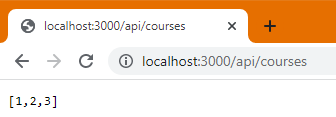

- In real world we are not going to use this http module to build a backend service for web app because as we add more routes (request conditions), the cide gets more complex.